## Q-Q Plot

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.api import qqplot
from sklearn.preprocessing import StandardScaler

In [2]:
df = sns.load_dataset('tips')
df['tip_rate'] = df['tip'] / df['total_bill']
df

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


In [3]:
male_tipr = df[df['sex'] == 'Male']['tip_rate']
female_tipr = df[df['sex'] == 'Female']['tip_rate']

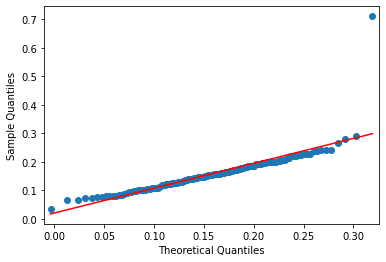

In [4]:
# sns.displot(male_tipr)
fig = qqplot(male_tipr, line='r',
             dist=stats.norm(loc=np.mean(male_tipr),
             scale=np.sqrt(stats.tvar(male_tipr))))

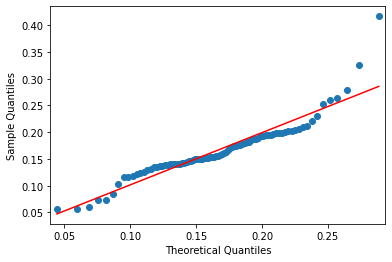

In [5]:
fig = qqplot(female_tipr, line='r',
             dist=stats.norm(loc=np.mean(female_tipr),
             scale=np.sqrt(stats.tvar(female_tipr))))

## シャピロ・ウィルク検定

df

In [6]:
stats.shapiro(male_tipr)

ShapiroResult(statistic=0.7447847127914429, pvalue=3.2243281107541917e-15)

Ｐ値 が５％以下なので正規分布ではない。

In [7]:
stats.shapiro(np.sort(male_tipr)[:-1])

ShapiroResult(statistic=0.9931070804595947, pvalue=0.6644759774208069)

Ｐ値が5%以上なので正規分布である、とうことを否定できない。

In [8]:
stats.shapiro(np.sort(female_tipr)[:-2])

ShapiroResult(statistic=0.9696651697158813, pvalue=0.04252713546156883)

Ｐ値 が５％以下なので正規分布ではない。

- シャピロ・ウィルクの検定を使う時は、はずれ値に注意する。（必要に応じて取り除いて検定する）
- シャピロ・ウィルクの検定だけ使用して確認するのではなく、Q-Q Plot と合わせて使うことで、より納得いくかたちでその Data の正規性を確認できる。

## F分布

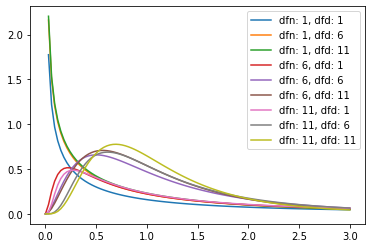

In [17]:
x = np.linspace(0, 3, 100)
for dfn in range(1, 12, 5):
    for dfd in range(1, 12, 5):
        y = stats.f.pdf(x, dfn=dfn, dfd=dfd)
        plt.plot(x, y, label=f'dfn: {dfn}, dfd: {dfd}')

plt.legend()


In [14]:
print(y)

[0.         0.40531083 0.52545536 0.5913956  0.62899876 0.6491711
 0.65781954 0.65855797 0.65376006 0.64505738 0.63360646 0.62024501
 0.60558909 0.59009664 0.57411039 0.55788782 0.54162252 0.5254597
 0.50950763 0.49384622 0.47853351 0.46361057 0.44910536 0.4350356
 0.42141115 0.40823571 0.3955083  0.38322435 0.37137655 0.35995557
 0.34895059 0.33834977 0.32814054 0.31830989 0.3088446  0.2997314
 0.29095709 0.28250862 0.27437322 0.26653839 0.25899202 0.25172232
 0.24471795 0.23796792 0.23146169 0.22518912 0.21914048 0.21330642
 0.20767802 0.2022467  0.19700429 0.19194296 0.18705523 0.18233395
 0.1777723  0.17336375 0.16910208 0.16498135 0.16099589 0.15714027
 0.15340932 0.14979811 0.14630191 0.14291623 0.13963676 0.13645939
 0.13338019 0.13039543 0.1275015  0.12469499 0.12197261 0.11933123
 0.11676786 0.11427962 0.11186378 0.1095177  0.10723888 0.1050249
 0.10287346 0.10078234 0.09874944 0.09677271 0.09485023 0.09298011
 0.09116057 0.08938989 0.08766643 0.08598859 0.08435488 0.08276381


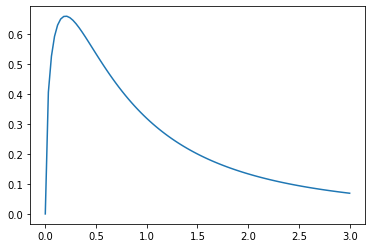

In [15]:
plt.plot(x, y)